# `Business Understanding`

Train a machine learning model to predict whether a customer is male or female

# `Data Understanding`

## Importation of all necessary packages

In [16]:
#data analysis
import pandas as pd
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sb

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import sklearn.naive_bayes


#model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#filter settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)


## Read Data

In [17]:
#load dataframe
df = pd.read_csv('dollar_tree-231012-195712.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [18]:
#find structure of data frame
df.shape

(34867, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [20]:
#find missing values
df.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [21]:
#filter rows with missing values
df[df.isna().any(axis = 1)]


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [22]:
# description stat on numeric columns
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [23]:
#description stat on categorical colomns
df.describe(include = 'object')

,Date,Month,Customer Gender,Country,State,Product Category,Sub Category
count,34866,34866,34866,34866,34866,34866,34866
unique,576,12,2,4,45,3,17
top,3/1/2016,June,M,United States,California,Accessories,Tires and Tubes
freq,196,3680,17805,18076,10332,22534,11112


In [24]:
#list column headers in dataframe
df.columns

Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')

In [25]:
#list unique values in Column1
df['Column1'].unique()

array([        nan, 2370.      ,  398.      , ..., 1971.      ,
       1568.      ,  687.344828])

In [26]:
#show correlation amongst columns
df.corr(numeric_only = True)

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083338,-0.145997
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083338,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


# `Data Preparation`

## Data Cleaning

In [27]:
#list unique vales in Customer Gender, Country
df['Customer Gender'].unique()

df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Germany', nan],
      dtype=object)

In [28]:
df['Customer Gender'].value_counts()

Customer Gender
M    17805
F    17061
Name: count, dtype: int64

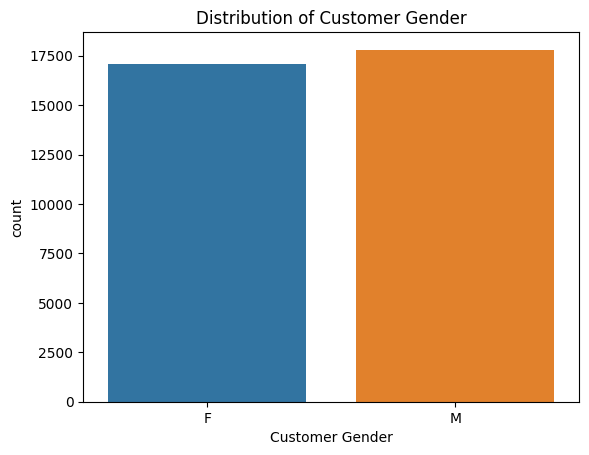

In [29]:
#Visualize the customer gender
sb.countplot(x='Customer Gender', data=df)
plt.title('Distribution of Customer Gender')
plt.show()

## Divide data into input and output

In [30]:
# Drop irrelevant columns
df_new = df[[ 'Customer Age', 'Customer Gender', 'Country','Sub Category', 'Unit Price', 'Quantity','Revenue']]
df_new.head()

,Customer Age,Customer Gender,Country,Sub Category,Unit Price,Quantity,Revenue
0,29.0,F,United States,Tires and Tubes,109.000000,1.0,109.0
1,29.0,F,United States,Gloves,28.500000,2.0,57.0
2,29.0,F,United States,Tires and Tubes,5.000000,3.0,15.0
3,29.0,F,United States,Tires and Tubes,116.500000,2.0,233.0
4,29.0,F,United States,Tires and Tubes,41.666667,3.0,125.0


#### The following columns 'index', 'Date', 'Year', 'Month',, 'State', 'Product Category'   'Unit Cost', 'Cost' and 'Column were dropped for the following reasons:
- 'Index' - was an entry identifier with no impact on the data
- 'Date', 'Month', 'Year' were recorded time references to when the data was collected and served as indices like 'index' column
- 'State' was closely linked to 'Country' and unlikely 'Country' didnt provide the more general overview we were interested in.
- 'Product Category' was linked to 'Sub Category' but gave a more details on the kinds of product being purchased and served our group's interest
- 'Unit Cost' and 'Cost' these details are not available to the customer when buying and therefore have no impact on buyer's activities
- 'Column 1' contained a lot of missing values together with numeric values with no label. 

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Age     34866 non-null  float64
 1   Customer Gender  34866 non-null  object 
 2   Country          34866 non-null  object 
 3   Sub Category     34866 non-null  object 
 4   Unit Price       34866 non-null  float64
 5   Quantity         34866 non-null  float64
 6   Revenue          34867 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.9+ MB


In [32]:
#drop missing values in target column
y = df_new['Customer Gender']
y = y.dropna()
y.shape

(34866,)

In [33]:
# drop missing values in feature columns
x = df_new.drop(['Customer Gender'], axis = 1)
x = x.dropna()
x.head()
x.shape

(34866, 6)

In [34]:
#split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Encoding

### 1. Encode the target column (the labels)


In [35]:
target_encoder = LabelEncoder()

y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

In [36]:
y_train_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [37]:
y_test_encoded.shape

(6974,)

### 2. Encode categorical columns

In [38]:
category = ['Country', 'Sub Category']
feature_encode = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

x_train_encoded = pd.DataFrame(feature_encode.fit_transform(x_train[category]))
x_test_encoded = pd.DataFrame(feature_encode.fit_transform(x_test[category]))

In [39]:
x_train_encoded.shape

(27892, 21)

In [40]:
x_test_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6970,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6971,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6972,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [41]:
x_train_encoded.reset_index(drop = True, inplace= True)
x_train.reset_index(drop = True, inplace = True)
x_train_new = pd.concat([x_train, x_train_encoded], axis = 1)
x_train_new.head()
#x_train_new.shape
x_train = x_train_new.drop(columns = ['Country', 'Sub Category'])

In [42]:
x_train.head()

,Customer Age,Unit Price,Quantity,Revenue,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,23.0,188.000000,2.0,376.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54.0,219.666667,3.0,659.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,51.333333,3.0,154.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20.0,524.000000,1.0,524.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,45.0,265.666667,3.0,797.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
x_test_encoded.reset_index(drop = True, inplace= True)
x_test.reset_index(drop = True, inplace = True)
x_test_new = pd.concat([x_test, x_test_encoded], axis = 1)
x_test_new.head()
#x_train_new.shape
x_test = x_test_new.drop(columns = ['Country', 'Sub Category'])

In [44]:
x_test.head()

,Customer Age,Unit Price,Quantity,Revenue,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,33.0,603.000000,1.0,603.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,42.0,1188.000000,1.0,1188.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,130.333333,3.0,391.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.0,93.000000,1.0,93.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,81.666667,3.0,245.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The choice of the best machine learning model for binary classification tasks depends on the specific characteristics of your dataset, the amount of data you have, and the nature of the problem. There is no one-size-fits-all answer, but several algorithms are commonly used for binary classification, and they perform well in different scenarios. Here are some popular choices:

Logistic Regression:

Simple and interpretable.
Works well when the relationship between features and the target variable is roughly linear.
Decision Trees:

Intuitive and easy to understand.
Can handle both numerical and categorical data.
Prone to overfitting but can be regularized.
Random Forest:

An ensemble of decision trees.
Provides good predictive accuracy and generalization.
Handles feature importance automatically.
Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost):

Combines weak learners into a strong one.
Often achieves state-of-the-art results.
Requires careful hyperparameter tuning.
Support Vector Machines (SVM):

Effective in high-dimensional spaces.
Suitable for small to medium-sized datasets.
Can handle both linear and non-linear classification tasks.
Neural Networks (Deep Learning):

Extremely flexible and capable of learning complex patterns.
Works well with large datasets.
Requires more data and computational resources compared to other methods.
Naive Bayes:

Simple and computationally efficient.
Often works surprisingly well, especially for text classification tasks.
K-Nearest Neighbors (K-NN):

Non-parametric method that can work well for small datasets.
Sensitive to the choice of the "k" parameter.
Ensemble Methods:

Combining multiple models (e.g., bagging, boosting, stacking) can often improve performance and generalization.
Gradient Boosting Machines (GBM):

Similar to gradient boosting but with different algorithms (e.g., AdaBoost).
Effective for boosting weaker learners.
To determine the best model for your binary classification problem, it's essential to consider factors such as the size and quality of your data, the nature of your features, the interpretability of the model, and your specific performance goals. Often, it's a good practice to try multiple models and perform cross-validation to assess their performance on your dataset before choosing the best one.

In [45]:
#convert all column heaers to str format
x_train.columns = x_train.columns.astype(str)

# `Modeling`

In [46]:
#train Naive_Bayes model
from sklearn.naive_bayes import CategoricalNB
model2 = CategoricalNB()
model2.fit(x_train, y_train_encoded)


CategoricalNB()

In [47]:
#predict target values with test features(x_test) with Naive_Bayes
x_test.columns = x_test.columns.astype(str)

target_predt2 = model2.predict(x_test)

#physical comparision of actual target and predicted target
print( f'Actual target vrs Predicted target: {y_test_encoded} ---> {target_predt2}')

Actual target vrs Predicted target: [1 1 0 ... 1 0 1] ---> [0 0 0 ... 0 1 0]


# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

array([[1605, 1826],
       [1587, 1956]], dtype=int64)

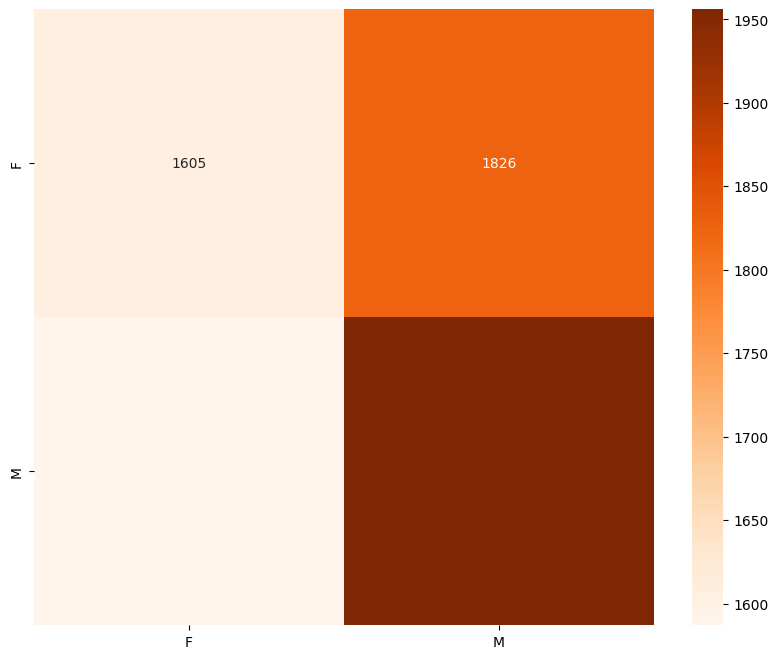

In [49]:
#for naive bayes model
matrix2 = confusion_matrix(y_test_encoded, target_predt2)

#visualise with a heatmap
#visualization settings
plt.figure(figsize=(10, 8))
sb.heatmap(matrix2, annot=True, fmt='d', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_, cmap='Oranges')
matrix2

### Build a classification Report

In [50]:
#reverse encoding
original_target_predt2 = target_encoder.inverse_transform(target_predt2)
original_y_test = target_encoder.inverse_transform(y_test_encoded)

In [51]:
#For Naive Bayes Model
print(classification_report(original_y_test, original_target_predt2))

              precision    recall  f1-score   support

           F       0.50      0.47      0.48      3431
           M       0.52      0.55      0.53      3543

    accuracy                           0.51      6974
   macro avg       0.51      0.51      0.51      6974
weighted avg       0.51      0.51      0.51      6974



### Conclusion

Precision and Recall, and F1 score values show that our trained model is 50% effective at rightly predicting the the gender of customers based the selected features used. 
F1 score shows that this model correctly predicts true postives at just about the same rate it predicts the actual postives in a set.
The evaluation metrics are expected to reveal a poorer performance when our model is tested on larger and fresher data.
Hence to improve our trained model,
we would have to perform some feature engineering on the train dataset, 
increase the size of our data,
possibly include more relevant features in our model training and 
perform some hyperparameter tuning.
After which a cross-validation evaluation would be performed to finally confirm the retrained model's performance.